In [1]:
df = spark.read.load('abfss://wwi-02@asadatalakevehn81y.dfs.core.windows.net/sale-poc/sale-20170501.csv', 
    format='csv',
    header = True)

StatementMeta(SparkPool01, 7, 1, Finished, Available)

In [5]:
df.show(3)

StatementMeta(SparkPool01, 7, 5, Finished, Available)

+--------------------+----------+---------+--------+-----+-----------+---------------+------------+----+------+-------+
|       TransactionId|CustomerId|ProductId|Quantity|Price|TotalAmount|TransactionDate|ProfitAmount|Hour|Minute|StoreId|
+--------------------+----------+---------+--------+-----+-----------+---------------+------------+----+------+-------+
|e067fc11-e07d-451...|         3|     4581|       4|20.84|     91.696|       20170501|      26.048|   2|    30|   7922|
|e067fc11-e07d-451...|         3|     1365|       4|26.52|    116.688|       20170501|      29.436|   2|    30|   7922|
|e067fc11-e07d-451...|         3|     2641|       4|29.71|    130.724|       20170501|        37.4|   2|    30|   7922|
+--------------------+----------+---------+--------+-----+-----------+---------------+------------+----+------+-------+
only showing top 3 rows



In [6]:
display(df.limit(3))

StatementMeta(SparkPool01, 7, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, 27afba8e-8a9c-41dd-be8b-3ea6ecc8e9e0)

In [7]:
transaction_df = df.select("TransactionId", "ProductId")
transaction_df.show(5)

StatementMeta(SparkPool01, 7, 7, Finished, Available)

+--------------------+---------+
|       TransactionId|ProductId|
+--------------------+---------+
|e067fc11-e07d-451...|     4581|
|e067fc11-e07d-451...|     1365|
|e067fc11-e07d-451...|     2641|
|e067fc11-e07d-451...|      220|
|e067fc11-e07d-451...|      110|
+--------------------+---------+
only showing top 5 rows



In [8]:
product_4581 = df.select("TransactionId", "ProductId") \
    .where((df["ProductId"]=="4581"))

StatementMeta(SparkPool01, 7, 8, Finished, Available)

In [9]:
product_4581.show(5)

StatementMeta(SparkPool01, 7, 9, Finished, Available)

+--------------------+---------+
|       TransactionId|ProductId|
+--------------------+---------+
|e067fc11-e07d-451...|     4581|
|bacee69c-dcd7-424...|     4581|
|2a082456-f581-477...|     4581|
|fda9e03c-d7f6-41c...|     4581|
|492de681-98dd-4aa...|     4581|
+--------------------+---------+
only showing top 5 rows



In [10]:
product_4581.count()

StatementMeta(SparkPool01, 7, 10, Finished, Available)

157

In [18]:
counts_df = df.select("ProductId", "CustomerId").groupBy("CustomerId").count()
counts_df.show(5)

StatementMeta(SparkPool01, 0, 18, Finished, Available)

+----------+-----+
|CustomerId|count|
+----------+-----+
|     93545|    3|
|     95134|    7|
|     97128|   12|
|    100227|   12|
|    100553|   12|
+----------+-----+
only showing top 5 rows



In [37]:
counts_df_plt = counts_df.toPandas()
counts_df_plt.head()

StatementMeta(SparkPool01, 0, 37, Finished, Available)

,CustomerId,count
0,93545,3
1,95134,7
2,97128,12
3,100227,12
4,100553,12


StatementMeta(SparkPool01, 0, 41, Finished, Available)

<Figure size 432x288 with 0 Axes>

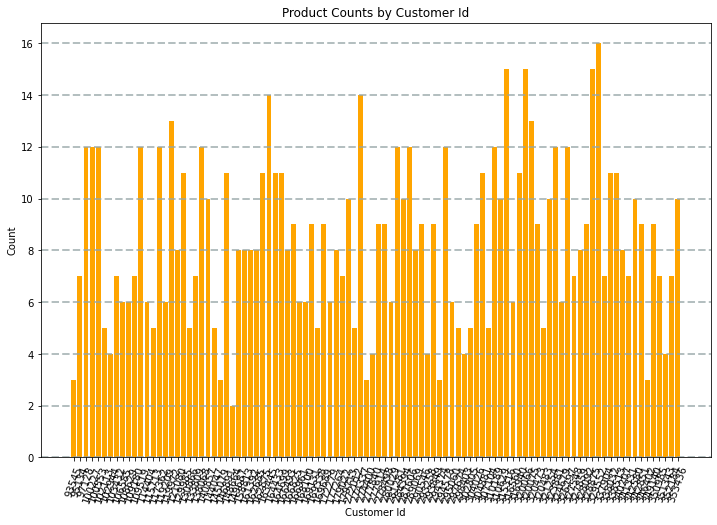

In [41]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by category
plt.bar(x=counts_df_plt['CustomerId'], height=counts_df_plt['count'], color='orange')

# Customize the chart
plt.title('Product Counts by Customer Id')
plt.xlabel('Customer Id')
plt.ylabel('Count')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()